<a href="https://colab.research.google.com/github/TilakSojitra/Machine-Learning/blob/master/ML10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


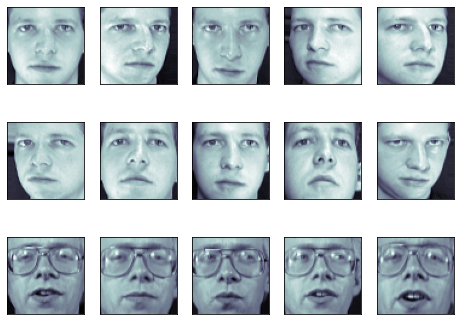

In [ ]:
%matplotlib inline
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target, random_state=133)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

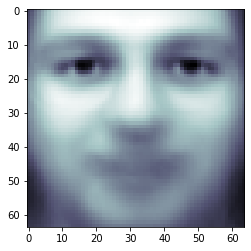

In [ ]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [ ]:
print(pca.components_.shape)

(150, 4096)


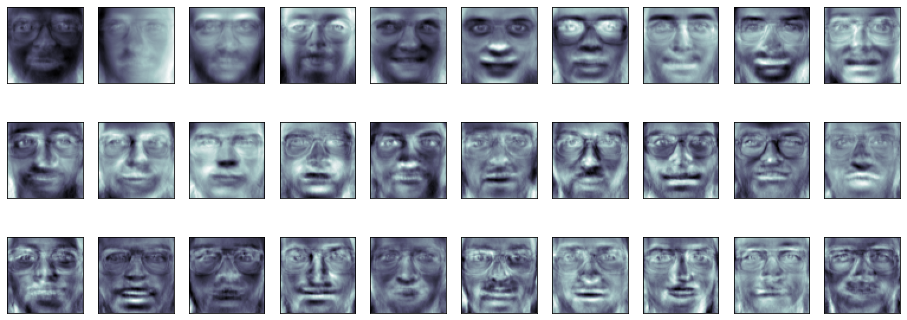

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),

    cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [ ]:
print(X_test_pca.shape)

(100, 150)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

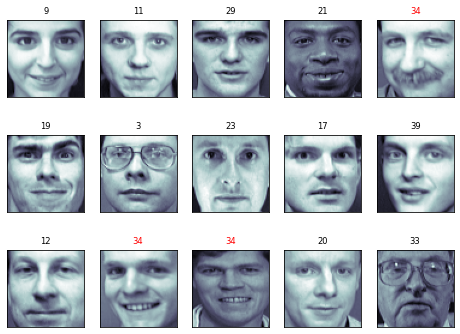

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),

    cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.75      0.86         4
           2       1.00      0.50      0.67         4
           3       1.00      0.50      0.67         4
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         4
          10       1.00      0.60      0.75         5
          11       0.67      1.00      0.80         2
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      0.50      0.67         2
          15       0.09      1.00      0.17         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
          18       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0 ... 0 0 0]
 [1 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[2 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

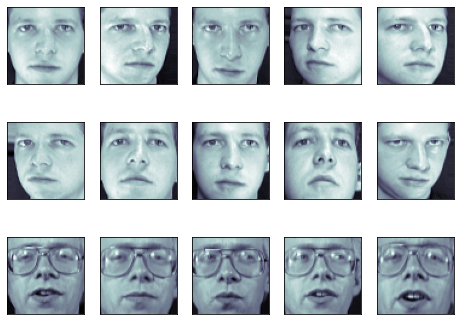

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(faces.data,faces.target, random_state=133)
print(X_train1.shape, X_test1.shape)

(300, 4096) (100, 4096)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

GaussianNB()

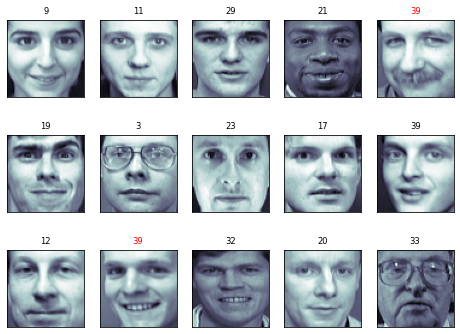

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test1[i].reshape(faces.images[0].shape),

    cmap=plt.cm.bone)

  y_pred1 = gnb.predict(X_test1[i, np.newaxis])[0]
  color = ('black' if y_pred1 == y_test[i] else 'red')
  ax.set_title(y_pred1, fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred1 = gnb.predict(X_test1)
print(metrics.classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         4
           2       1.00      0.50      0.67         4
           3       1.00      0.75      0.86         4
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         4
          10       1.00      0.60      0.75         5
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       0.12      1.00      0.22         1
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         4
          18       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations.
3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system.

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset)
data=dataset.data
label=dataset.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data,label, random_state=98)
print(X_train2.shape, X_test2.shape)

(112, 4) (38, 4)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train2)

PCA(n_components=2, whiten=True)

In [ ]:
X_train_pca1 = pca.transform(X_train2)
X_test_pca1 = pca.transform(X_test2)
print(X_train_pca1.shape)

(112, 2)


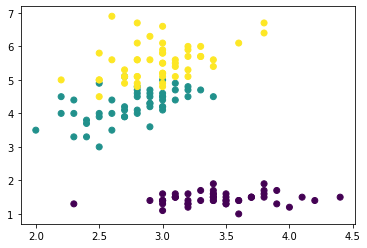

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1], data[:,2], c=label)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca1, y_train2)

GaussianNB()

In [ ]:
from sklearn import metrics
y_pred2 = gnb.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.65      0.79        17
           2       0.65      1.00      0.79        11

    accuracy                           0.84        38
   macro avg       0.88      0.88      0.86        38
weighted avg       0.90      0.84      0.84        38



**Components=1**

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1, whiten=True)
pca.fit(X_train2)

PCA(n_components=1, whiten=True)

In [ ]:
X_train_pca1 = pca.transform(X_train2)
X_test_pca1 = pca.transform(X_test2)
print(X_train_pca1.shape)

(112, 1)


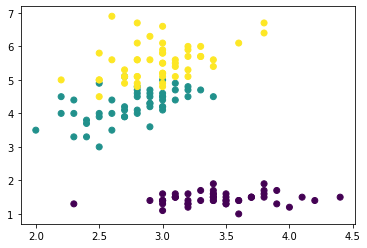

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1], data[:,2], c=label)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca1, y_train2)

GaussianNB()

In [ ]:
from sklearn import metrics
y_pred2 = gnb.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.76      0.87        17
           2       0.73      1.00      0.85        11

    accuracy                           0.89        38
   macro avg       0.91      0.92      0.90        38
weighted avg       0.92      0.89      0.90        38



4. Replace Naive Bayes Classifier with Decision Tree Classifier and then Support Vector Machine and compare performance of all three of them.



In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data,label, random_state=98)
print(X_train2.shape, X_test2.shape)

(112, 4) (38, 4)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train2)

PCA(n_components=2, whiten=True)

In [ ]:
X_train_pca2 = pca.transform(X_train2)
X_test_pca2 = pca.transform(X_test2)
print(X_train_pca1.shape)

(112, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=133)
dtc.fit(X_train_pca2, y_train2)

DecisionTreeClassifier(random_state=133)

In [ ]:
from sklearn import metrics
y_pred3 = dtc.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred3))

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_pca1, y_train2)

SVC()

In [ ]:
from sklearn import metrics
y_pred4 = clf.predict(X_test_pca1)
print(metrics.classification_report(y_test2, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.76      0.87        17
           2       0.73      1.00      0.85        11

    accuracy                           0.89        38
   macro avg       0.91      0.92      0.90        38
weighted avg       0.92      0.89      0.90        38

